# Histograms in matplotlib for comparison

In [1]:
import uproot as up
import numpy as np
import matplotlib.pyplot as plot
import pandas as pd

In [2]:
# MC_low = up.concatenate("/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/OutputFiles/Slurm_Spring_24/July_16/driver_subset/*.root:tree_low")
# MC_high = up.concatenate("/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/OutputFiles/Slurm_Spring_24/July_16/Run_2_single_pion/*.root:tree_high")
# driver_high = up.concatenate("/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/Analysis/BoxAffinity/root_files/July_16_new_R2_driver_all_files_high.root:tree_driver")
# driver_low = up.concatenate("/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/Analysis/BoxAffinity/root_files/July_16_new_R2_driver_all_files_low.root:tree_driver")

MC_low = up.concatenate("/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/OutputFiles/Slurm_Spring_24/July_17/driver_subset/*.root:tree_low")
MC_high = up.concatenate("/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/OutputFiles/Slurm_Spring_24/July_17/Run_2_single_pion/*.root:tree_high")
driver_high = up.concatenate("/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/Analysis/BoxAffinity/root_files/July_17_old_R2_driver_MCNP_high.root:tree_driver")
driver_low = up.concatenate("/w/hallb-scshelf2102/clas12/users/rojokell/MCLundAnalysis/Analysis/BoxAffinity/root_files/July_17_old_R2_driver_MCNP_low.root:tree_driver")

In [3]:
MC_list = [MC_low,MC_high]
driver_list = [driver_low,driver_high]
high_low = ["low","high"]

In [4]:
R_vars_MC = ["R0","R1","R2_adjust"]
R_vars_driver = ["R0","R1","R2"]

In [6]:
MC_low_cut = [[] for i in range(3)]
MC_high_cut = [[] for i in range(3)]
MC_list_cut = [MC_low_cut, MC_high_cut]
for low_high_idx in range(2):
    for i in range(len(MC_list[low_high_idx])):
        for j in range(len(R_vars_MC)):
            if(MC_list[low_high_idx][R_vars_MC[j]][i] < 5):
                MC_list_cut[low_high_idx][j].append(MC_list[low_high_idx][R_vars_MC[j]][i])
            
driver_low_cut = [[] for i in range(3)]
driver_high_cut = [[] for i in range(3)]
driver_list_cut = [driver_low_cut, driver_high_cut]
for low_high_idx in range(2):
    for i in range(len(driver_list[low_high_idx])):
        for j in range(len(R_vars_driver)):
            if(driver_list[low_high_idx][R_vars_driver[j]][i] < 5):
                driver_list_cut[low_high_idx][j].append(driver_list[low_high_idx][R_vars_driver[j]][i])

In [58]:
min_MC = min(MC_list_cut[1][0])
max_MC = max(MC_list_cut[1][0])

min_driver = min(driver_list_cut[1][0])
max_driver = max(driver_list_cut[1][0])

range_driver = max_driver - min_driver

range_MC = max_MC - min_MC
n_bins_driver = 5
bin_width = range_driver / n_bins_driver
n_bins_MC = int(np.floor(range_MC / bin_width))

In [59]:
n_bins_MC

3055

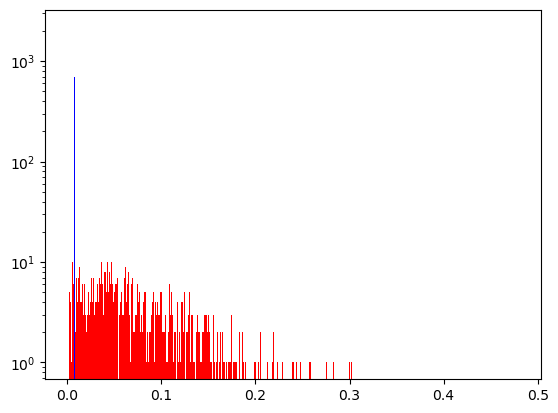

In [69]:
fig, ax = plot.subplots(1,1)
N_MC, bins_MC, patches_MC = ax.hist(MC_list_cut[1][0],density = False,color = "red",bins = n_bins_MC)
N_driver, bins_driver, patches_driver = ax.hist(driver_list_cut[1][0],density = False, color = "blue",bins = n_bins_driver)
# ax.set_xlim(0,0.02)
ax.set_yscale('log')

In [67]:
N_MC, bins_MC

(array([2., 2., 1., ..., 0., 0., 1.]),
 array([0.00049016, 0.00064696, 0.00080375, ..., 0.47917818, 0.47933497,
        0.47949176]))

In [68]:
N_driver, bins_driver

(array([  23.,  125.,  697., 1402., 2209.]),
 array([0.00743388, 0.00759065, 0.00774741, 0.00790418, 0.00806095,
        0.00821772]))

In [6]:
pref = "csv/"
file_names_low = ["R0_data_low.csv","R1_data_low.csv","R2_data_low.csv"]
file_names_high = ["R0_data_high.csv","R1_data_high.csv","R2_data_high.csv"]
centers = [[] for i in range(2)]
for i in range(3):
    centers[0].append(pd.read_csv(pref + file_names_low[i])['0'].to_numpy())#low
    centers[1].append(pd.read_csv(pref + file_names_high[i])['0'].to_numpy())#high

In [ ]:


for i in range(2):
    fig, axs = plot.subplots(1,3, figsize= (14,4))
    MC = MC_list_cut[i]
    driver = driver_list_cut[i]
    MC_R0 = MC[0]
    MC_R1 = MC[1]
    MC_R2 = MC[2]

    driver_R0 = driver[0]
    driver_R1 = driver[1]
    driver_R2 = driver[2]
    
    diff = len(MC_R1) - len(driver_R1)
    print(f"diff %: {diff / len(MC_R1) * 100}")
    n_bins_driver = 100
    
    range_driver = max(driver_R1) - min(driver_R1)
    range_MC = max(MC_R1) - min(MC_R1)
    bin_width = range_driver / n_bins_driver
    n_bins_MC = int(round(range_MC / bin_width))
    
    axs[0].set_title(f"R0, {high_low[i]} aff")
    axs[0].hist(MC_R0, bins = 100, alpha = 0.4, color = "orange",density = True, label = "MC")
    axs[0].hist(driver_R0, bins = 100, alpha = 0.4, color = "b",density = True, label = "driver MCNP")
#     axs[0].hist(centers[i][0], bins = 100, alpha = 0.4, color = "r",density = True, label = "centers")
    axs[0].legend()
    if(i == 1):
        axs[0].set_yscale("log")
    
    axs[1].set_title(f"R1, {high_low[i]} aff")
    axs[1].hist(MC_R1, bins = 100, alpha = 0.4, color = "orange",density = True, label = "MC")
    axs[1].hist(driver_R1, bins = 100, alpha = 0.4, color = "b",density = True, label = "driver MCNP")
#     axs[1].hist(centers[i][1], bins = n_bins_driver, alpha = 0.4, color = "r",density = True, label = "centers")
    if(not i):
        axs[1].set_xlim(0,3)
    
    axs[2].set_title(f"new R2, {high_low[i]} aff")
    axs[2].hist(MC_R2, bins = 100, alpha = 0.4, color = "orange",density = True)
    axs[2].hist(driver_R2, bins = 100, alpha = 0.4, color = "b",density = True)
#     axs[2].hist(centers[i][2], bins = 100, alpha = 0.4, color = "r",density = True)

    fig.tight_layout()
    fig.savefig(f"Histos/Ratios/July_17/mpl_new_{high_low[i]}_MC_driver_MCNP.pdf")


In [50]:
max(driver_R1)

7463.91560925857

(array([   6.,   17.,   30.,   95.,  278.,  419.,  630.,  772.,  991.,
        1218.]),
 array([0.00743388, 0.00751226, 0.00759065, 0.00766903, 0.00774741,
        0.0078258 , 0.00790418, 0.00798257, 0.00806095, 0.00813934,
        0.00821772]),
 <BarContainer object of 10 artists>)

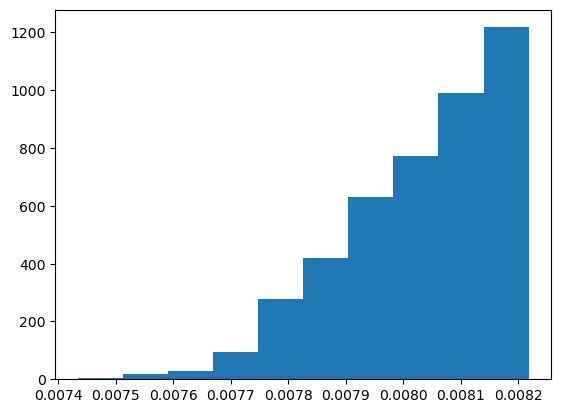

In [16]:
plot.hist(driver_R0,bins = 10)
# plot.hist(MC_R0,bins = 10)